In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install arabic_reshaper
print('Ok!')

Ok!


In [26]:
data = pd.read_csv('tweet.csv')
data.head()

,Tweets,created_at
0,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,2021-04-30 23:58:01
1,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,2021-04-30 22:07:53
2,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,2021-04-30 20:21:43
3,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,2021-04-30 20:11:42
4,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,2021-04-30 19:04:06


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      2869 non-null   object
 1   created_at  2869 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


In [28]:
data.Tweets

0       حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...
1       هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...
2       يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...
3           اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه
4       خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...
                              ...                        
2865                                  ينهون هاليومين يروح
2866                                          ماحدا بيسال
2867    برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...
2868    لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...
2869    كلوب امام القرار المصيري لموقعة ريال مدريد وجو...
Name: Tweets, Length: 2870, dtype: object

## Text tokinization

In [29]:
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\Computergy
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Define a list of arabic and english punctiations that we want to get rid of in our text
import string
import re 
arb_stopwords = set(nltk.corpus.stopwords.words("arabic")).union({'ا','و','الله','او','من','الى','عن','على','في','ي','ال','ه','ف','ع','ب','ان','م'})

def preprocess(text):
    
    '''
    remove stop words and unkwon characters
    '''
    text = str(text)
    text= re.sub("الردن",'الاردن' ,text)
    text= re.sub("ال",' ' ,text)
    filtered = []
    for w in text.split():
        w = re.sub(r"[0-9a-zA-Z]", "", w,flags=re.I)
        if w not in arb_stopwords:
            filtered.append(w)
    text = ' '.join(word for word in filtered)

    return text
  
data['Tweets'] = data['Tweets'].apply(preprocess)
print(data.head(5))

                                              Tweets           created_at
0               شعب اخذ لقاح ريت ثقافة بوس ترجع ابدا  2021-04-30 23:58:01
1  خدمة تلقيح لكبار سن منزل اذا ماهي ية تسجيل وما...  2021-04-30 22:07:53
2  يادي بلاوي ورا بعضيها شو نعمل طيب ناخد لقاح اي...  2021-04-30 20:21:43
3                    اخد لقاح هاي فترة شو نوع اخدتوه  2021-04-30 20:11:42
4  خبراء لقاح حل امثل لعودة تعليم وجاهي احداث يوم...  2021-04-30 19:04:06


In [31]:
Tweets = data['Tweets'].values.tolist()

In [32]:
tokenized = []
for i in Tweets :
    i = word_tokenize(i)
    for b in i :
        tokenized.append(b)

In [33]:
print('tokeniz=',len(tokenized ))
print('type=',len(set(tokenized) ))

tokeniz= 36114
type= 9344


In [34]:
from arabic_reshaper import reshape      
from bidi.algorithm import get_display   

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized )
counts = ((rtl(k),v) for k, v in COUNTS.most_common(15))

In [35]:
COUNTS.most_common(20)

[('لقاح', 1196),
 ('مطعوم', 1187),
 ('كورونا', 812),
 ('اردن', 454),
 ('عاجل', 320),
 ('جرعة', 291),
 ('مطاعيم', 236),
 ('صحة', 230),
 ('انا', 184),
 ('يوم', 169),
 ('مش', 142),
 ('فايزر', 139),
 ('تلقوا', 135),
 ('استرازينيكا', 133),
 ('انه', 133),
 ('مليون', 130),
 ('اخباري', 130),
 ('ناس', 127),
 ('اولى', 124),
 ('اي', 122)]

In [36]:
word=[]
count=[]
for i in counts:
    word.append(i[0])
    count.append(i[1])


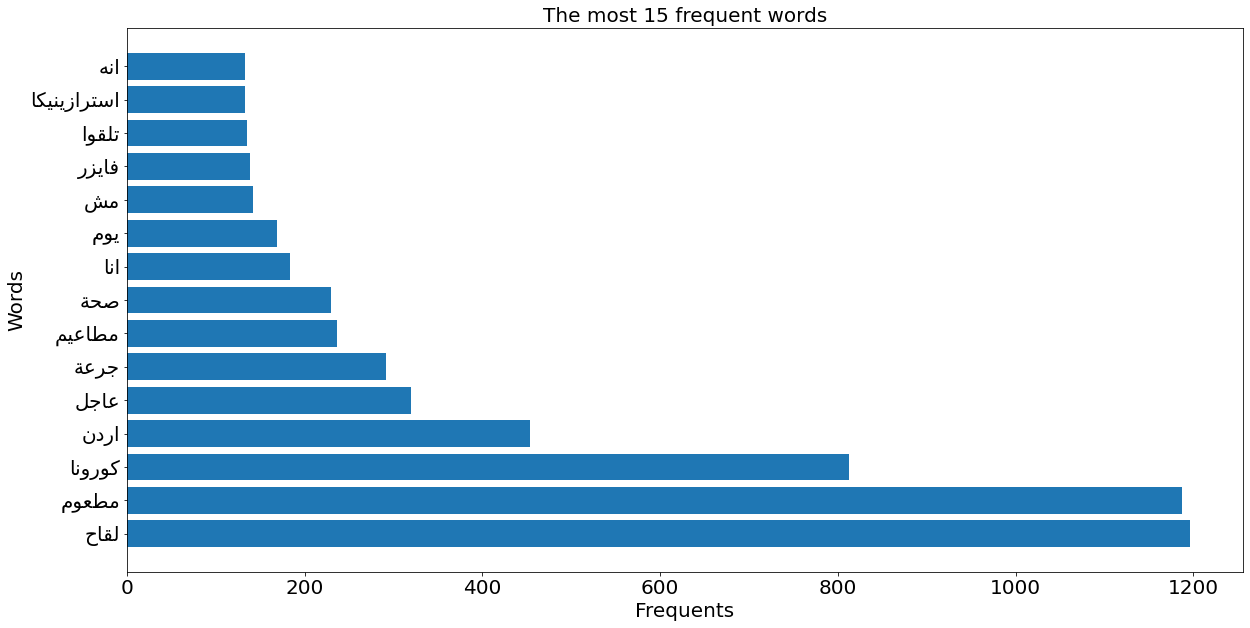

In [37]:
plt.barh(word, count)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Words' , fontsize=20)
plt.xlabel('Frequents' , fontsize=20)
plt.title('The most 15 frequent words' , fontsize=20)
plt.savefig('Figures\most common words.png')
plt.show()

# wordcloud

In [38]:
#!pip install wordcloud
print('Ok!')

Ok!


In [39]:
import numpy as np
from wordcloud import ImageColorGenerator 
from PIL import Image
Jordan = np.array(Image.open('Images\jo.png'))

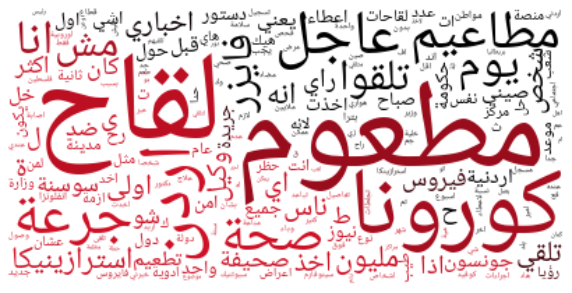

In [44]:
from wordcloud import WordCloud          
         
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

# Font color
image_colors = ImageColorGenerator(Jordan)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
#plt.imshow(wordcloud)#, interpolation="bilinear")

plt.axis("off")
plt.savefig('Figures\WordCloud.png')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()


_____________________________________________________________________________________

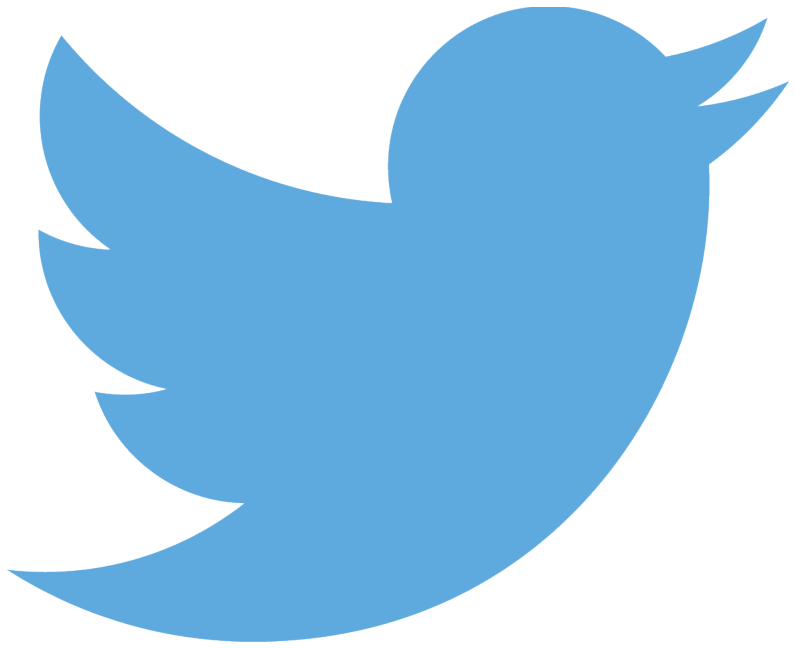

In [41]:
Twitter = np.array(Image.open('Images\Twitter_logo_blue.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(Twitter, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# -- Arabic text dependencies
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

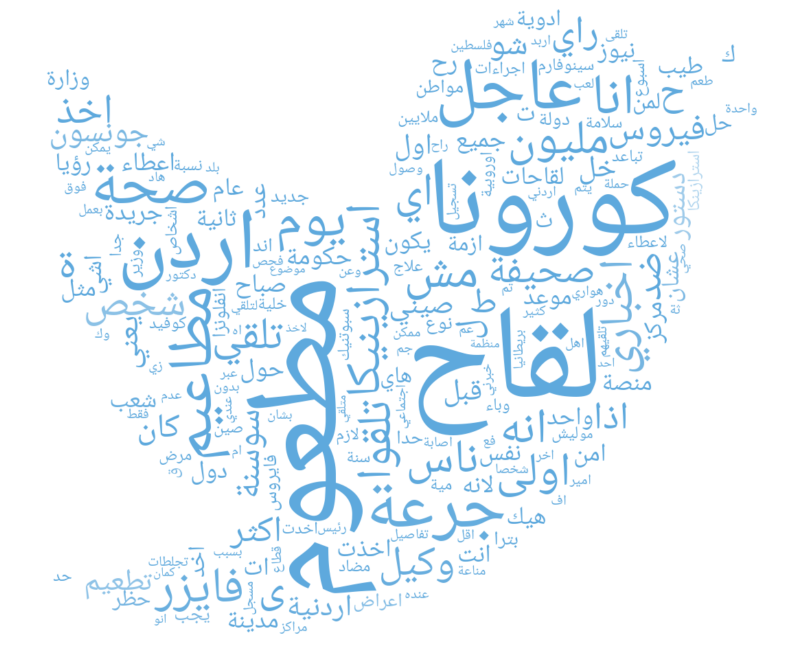

In [43]:
# instantiate a word cloud object
wordcloud = WordCloud(font_path=font_file, background_color="white", mask = Twitter )

# generate the word cloud
wordcloud.generate_from_frequencies(counts)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

image_colors = ImageColorGenerator(Twitter)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
plt.axis("off")
plt.savefig('Figures\WordCloud2.png')
plt.show()

# ِAfter Sentement Analysis